# Tutorial 2: My first matching

# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# For symbolic computation (solving algebra problems)
import sympy as sp

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

#### Considering the periodic solution of the equation of motion of a FODO cell and imposing the **thin lens approximation** and the stability condition one can get the following relations between optics parameters and magnets properties:

$$\color{blue}{\text{Figure 1: Thin lens approximation FODO phase advance as a function of K, $L_{cell}$ and $L_q$}}$$ 

In [12]:
# Relation between the phase advance of the cell and K, Lcell, Lq 
a, b, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(d*m/pi,2/pi*sp.asin(K*Lq*Lc/4))

Eq(\Delta*\mu/\pi, 2*asin(K*L_{cell}*L_{q}/4)/\pi)

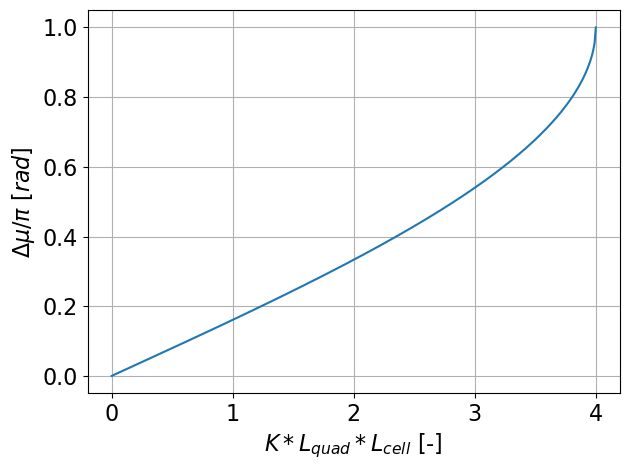

In [13]:
# Parametric plots
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

x=np.arange(0,4.01,0.01)
y=2*np.arcsin(x/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi~[rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

$$\color{blue}{\text{Figure 2: Thin lens approximation maximum and minimum FODO $\beta$-function as a function of K, $L_{cell}$ and $L_q$}}$$

In [14]:
# Relation between the beta of the cell and K, Lcell, Lq
a, bmin, bmax, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta_{min}, \beta_{max}, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(bmin/Lc,(1-(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{min}/L_{cell}, (-K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

In [15]:
sp.Eq(bmax/Lc,(1+(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{max}/L_{cell}, (K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

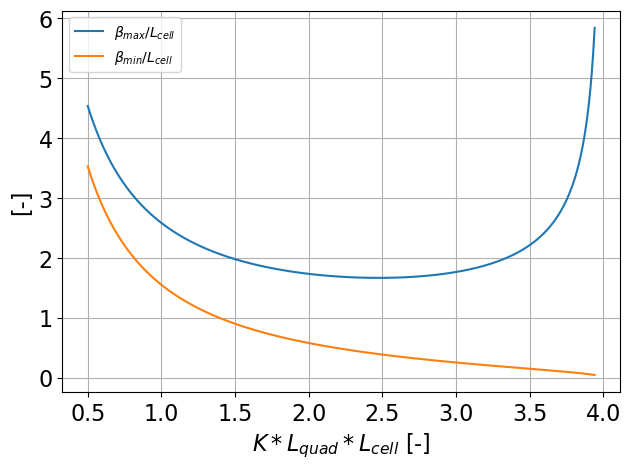

In [17]:
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

x=np.arange(0.5,3.95,0.01)
betamax=(1+(x/4))/(np.sin(2*np.arcsin(x/4)))
betamin=(1-(x/4))/(np.sin(2*np.arcsin(x/4)))
fig, ax1 = plt.subplots()
ax1.plot(x,betamax,'-',label=r"$\beta_{max}/L_{cell}$")
ax1.plot(x,betamin,'-',label=r"$\beta_{min}/L_{cell}$")
ax1.set_ylabel("[-]", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
plt.grid()
plt.legend()
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

# Launching MAD-X

In [18]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.15 14:23:09      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Questions

#### 1. Using the thin lens approximation solution from Fig. 3 (left) compute the required strength to power the quadrupoles to obtain a phase advance in the FODO cell of 90 degrees. Using the calculated K value, compute the linear optics functions using MAD-X. What is the phase advance computed by MAD-X?

#### 2. And the $\beta_{max}$ value computed by MAD-X? Compare the obtained value with the thin lens approximation solution from Fig. 3 (right)

#### 3. Reduce by half the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$, $\beta_{min}$ and $\Delta \mu$? Compare the obtained values with the thin lens approximation from Fig. 3

#### 4. Compute the maximum beam size, $\sigma_{x,y}$ , assuming a normalized horizontal and vertical emittance, $\epsilon_n^{x,y}$, of 3 mrad mm and $E_{tot}$ = 7 TeV using the following relation:

$\begin{equation} \sigma_{x,y}=\sqrt{\frac{\beta_{x,y} \epsilon_n^{x,y}}{ \gamma_r}} \end{equation}$